In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#train_btc= pd.read_csv('dataset.csv')
train_eth= pd.read_csv('Dataset_eth.csv')

In [3]:
train_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
train_eth["Date"]=pd.to_datetime(train_eth["Date"])
train_eth.set_index('Date', inplace=True)

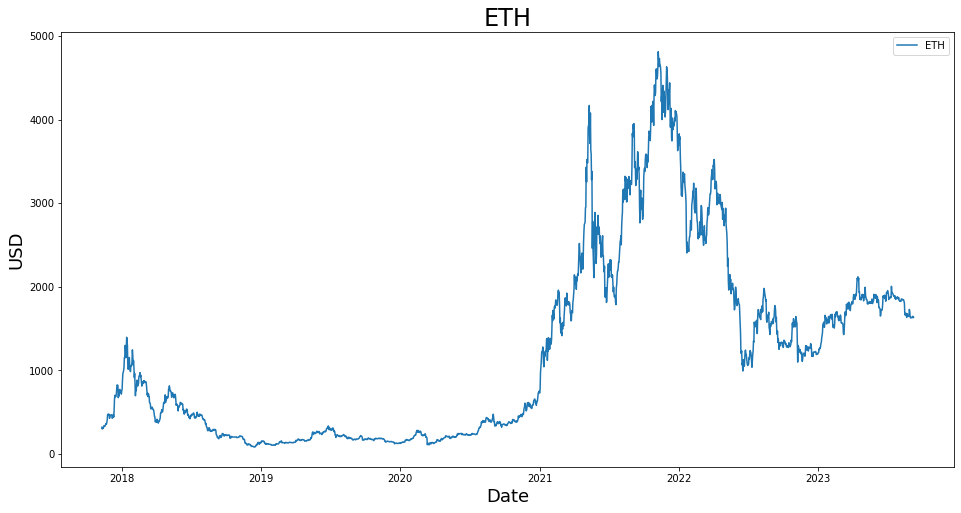

In [5]:
plt.figure(figsize=(16,8))
plt.title('ETH', fontsize=24)
#plt.plot(train_btc['Close'], label= "BTC")
plt.plot(train_eth['Close'], label="ETH")
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.legend()
plt.show()

In [ ]:
data = train_eth.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

In [12]:
len(train_eth)

2131

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
ETH_training_scaled=sc.fit_transform(dataset)

In [ ]:
train_data = ETH_training_scaled[0:training_data_len, :]

In [16]:
ETH_training_scaled=sc.fit_transform(dataset_eth)

In [17]:
x_train_ETH = []
y_train_ETH = []
for i in range(80, len(train_data)):
    x_train_ETH.append(train_data[i-80:i, 0])
    y_train_ETH.append(train_data[i, 0])
x_train_ETH,y_train_ETH=np.array(x_train_ETH), np.array(y_train_ETH)

In [19]:
x_train_ETH = np.reshape(x_train_ETH, (x_train_ETH.shape[0],x_train_ETH.shape[1], 1))

In [22]:
test_data = ETH_training_scaled[training_data_len- 60: ,:]
X_test = []
y_test = dataset[training_data_len: ,:]
for i in range(80, len(test_data)):
  X_test.append(test_data[i-80 : i, 0])

In [23]:
X_test = np.array(X_test)

In [24]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
from tensorflow.keras import models, layers, Sequential

In [29]:
Reg= Sequential()
Reg.add(layers.LSTM(50, return_sequences=True, input_shape= (x_train_ETH.shape[1], 1)))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50, return_sequences=True))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50, return_sequences=True))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.Dense(1))

In [30]:
Reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [31]:
Reg.compile(optimizer='adam',loss='mean_squared_error')

In [32]:
history = Reg.fit(x_train_ETH, y_train_ETH, batch_size=32,epochs=25)

Train on 1645 samples
Epoch 1/25
1645/1645 [==============================] - 5s 3ms/sample - loss: 0.0135
Epoch 2/25
1645/1645 [==============================] - 1s 546us/sample - loss: 0.0050
Epoch 3/25
1645/1645 [==============================] - 1s 559us/sample - loss: 0.0045
Epoch 4/25
1645/1645 [==============================] - 1s 546us/sample - loss: 0.0049
Epoch 5/25
1645/1645 [==============================] - 1s 547us/sample - loss: 0.0036
Epoch 6/25
1645/1645 [==============================] - 1s 547us/sample - loss: 0.0036
Epoch 7/25
1645/1645 [==============================] - 1s 558us/sample - loss: 0.0033
Epoch 8/25
1645/1645 [==============================] - 1s 543us/sample - loss: 0.0034
Epoch 9/25
1645/1645 [==============================] - 1s 541us/sample - loss: 0.0026
Epoch 10/25
1645/1645 [==============================] - 1s 555us/sample - loss: 0.0029
Epoch 11/25
1645/1645 [==============================] - 1s 556us/sample - loss: 0.0026
Epoch 12/25
1645/1645

In [34]:
predictions_1 = Reg.predict(X_test)
predictions_1 = sc.inverse_transform(predictions_1)
len(predictions_1)

426

In [36]:
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

80.30550500372286

/home/shegun/anaconda3/envs/GPU_Stations/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


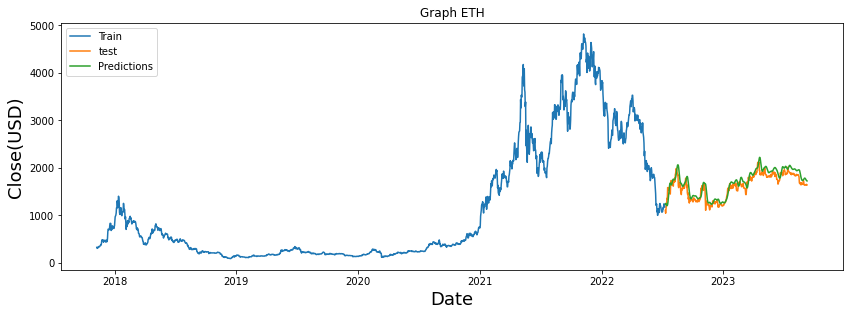

In [37]:
train = train_eth[:training_data_len]

valid_1 = train_eth[training_data_len:]
valid_1['Predictions'] = predictions_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Graph ETH')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close(USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'test', 'Predictions'], loc='upper left')

In [38]:
pred = data[-60:].values
scaled = sc.fit_transform(pred)
today_btc = []
today_btc.append(scaled)
today_btc = np.array(today_btc)
today_btc = np.reshape(today_btc, (today_btc.shape[0], today_btc.shape[1], 1))
pred_price = Reg.predict(today_btc)

In [39]:
pred_price = sc.inverse_transform(pred_price)
print(pred_price)

[[1632.526]]


In [40]:
Reg.save("CryptoPaper_eth")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CryptoPaper_eth/assets
